In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="darkgrid")
colors = {'negative': '#EF5958', 'neutral': '#F7941D', 'positive': '#00C186'}

DATA_DIR = '/home/zlata/Hates-speech-detection/dataset'
CATEGORIES = {'neg': 'negative', 'neu': 'neutral', 'pos': 'positive'}

# === Load data from folders ===
data = []
for folder, label in CATEGORIES.items():
    folder_path = os.path.join(DATA_DIR, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read().strip()
                data.append({'text': text, 'label': label, 'filename': filename})

df = pd.DataFrame(data)

In [4]:
# === Dataset structure ===
print("Columns in the dataset:", df.columns.tolist())
print("\nExample row:")
print(df.iloc[0])

Columns in the dataset: ['text', 'label', 'filename']

Example row:
text        В 2003-ем году под руководством малоизвестного...
label                                                negative
filename                                        1000083-0.txt
Name: 0, dtype: object


In [5]:
# === Class distribution ===
print("\nNumber of reviews per class:")
print(df['label'].value_counts())

print("\nPercentage distribution of classes:")
print(df['label'].value_counts(normalize=True) * 100)


Number of reviews per class:
label
positive    87138
neutral     24704
negative    19827
Name: count, dtype: int64

Percentage distribution of classes:
label
positive    66.179587
neutral     18.762199
negative    15.058214
Name: proportion, dtype: float64


In [6]:
# === Compute text lengths (characters and words) ===
df['char_len'] = df['text'].apply(len)
df['word_len'] = df['text'].apply(lambda x: len(x.split()))

# === Length statistics ===
#длина отзывов в символах
print("\nText length statistics (characters):")
print(df['char_len'].describe())
#длина отзывов в словах
print("\nText length statistics (words):")
print(df['word_len'].describe())


Text length statistics (characters):
count    131669.000000
mean       2262.561879
std        1367.391151
min          58.000000
25%        1279.000000
50%        1932.000000
75%        2901.000000
max       13642.000000
Name: char_len, dtype: float64

Text length statistics (words):
count    131669.000000
mean        336.042592
std         200.753824
min           8.000000
25%         191.000000
50%         288.000000
75%         431.000000
max        2059.000000
Name: word_len, dtype: float64


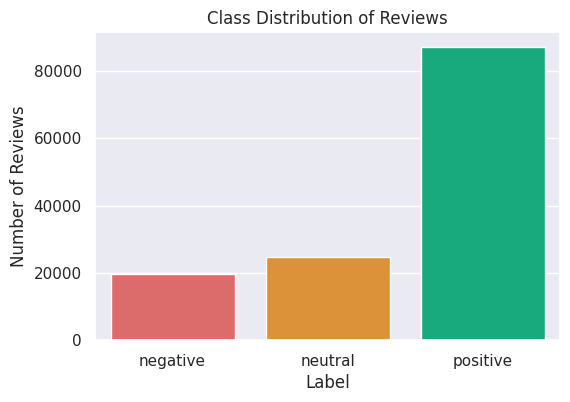

In [24]:
# === Barplot: class distribution (распределение классов)===
plt.figure(figsize=(6, 4))
sns.countplot(x='label', hue='label', data=df, palette=colors, legend=False)
plt.title("Class Distribution of Reviews")
plt.xlabel("Label")
plt.ylabel("Number of Reviews")
plt.show()

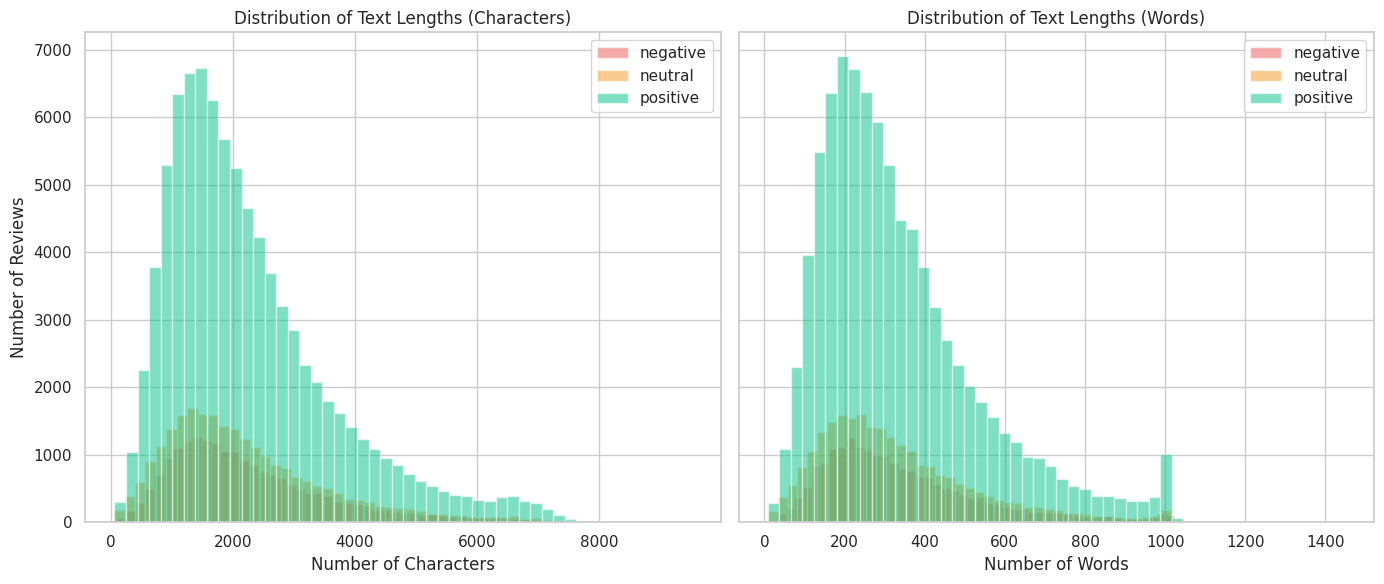

In [31]:
import matplotlib.pyplot as plt

# Custom color mapping for each class
colors = {
    'negative': '#EF5958',  # Red
    'neutral': '#F7941D',   # Orange
    'positive': '#00C186'   # Green
}

# Optional trimming of long tails
df_trimmed = df[df['char_len'] < 10000]
df_trimmed = df_trimmed[df_trimmed['word_len'] < 1500]

# Prepare figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram: Characters
for label in ['negative', 'neutral', 'positive']:
    values = df_trimmed[df_trimmed['label'] == label]['char_len']
    axs[0].hist(values, bins=50, alpha=0.5, label=label, color=colors[label])
axs[0].set_title("Distribution of Text Lengths (Characters)")
axs[0].set_xlabel("Number of Characters")
axs[0].set_ylabel("Number of Reviews")
axs[0].legend()

# Histogram: Words
for label in ['negative', 'neutral', 'positive']:
    values = df_trimmed[df_trimmed['label'] == label]['word_len']
    axs[1].hist(values, bins=50, alpha=0.5, label=label, color=colors[label])
axs[1].set_title("Distribution of Text Lengths (Words)")
axs[1].set_xlabel("Number of Words")
axs[1].legend()

plt.tight_layout()
plt.show()
